In [2]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20" 2023-07-18; OpenJDK Runtime Environment (build 11.0.20+8-post-Ubuntu-1ubuntu120.04); OpenJDK 64-Bit Server VM (build 11.0.20+8-post-Ubuntu-1ubuntu120.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp1glejizy
  JVM stdout: /tmp/tmp1glejizy/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp1glejizy/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,10 secs
H2O_cluster_timezone:,Etc/GMT
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.2
H2O_cluster_version_age:,1 month and 6 days
H2O_cluster_name:,H2O_from_python_unknownUser_zjezof
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.926 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [5]:
data_path = "train_data__df2catencode_ultimate.csv"

# Load data into H2O
df = h2o.import_file(data_path)
df = df.drop('C1')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [7]:
df

Hospital_code,Bed_Grade,Severity_of_Illness,Visitors_with_Patient,Age,Department,Ward_Type,Type_of_Admission,Stay,Ward_Facility_Code_At_Hospital_type_code
8,2,3,2,55,31.9855,31.9855,31.9855,5,50
2,2,3,2,55,18.4928,31.9855,31.9855,45,50
10,2,3,2,55,31.9855,38.4928,38.4928,35,50
26,2,3,2,55,27.3285,18.4928,37.3285,45,50
26,2,3,2,55,31.7464,37.3285,39.2464,45,50
23,2,3,2,55,33.4928,39.2464,40.3971,15,35.4403
32,3,3,2,55,34.3971,34.3971,18.4928,5,50
23,3,3,2,55,29.4976,31.9855,36.1643,45,53.2079
1,4,3,2,55,31.9855,27.3285,37.4265,55,7.81604
10,3,3,2,55,43.4928,29.4976,39.6232,35,50


In [8]:
df.describe()

Rows:318438
Cols:10

,Hospital_code,Bed_Grade,Severity_of_Illness,Visitors_with_Patient,Age,Department,Ward_Type,Type_of_Admission,Stay,Ward_Facility_Code_At_Hospital_type_code
type,int,int,int,int,int,real,real,real,int,real
mins,1.0,1.0,1.0,0.0,5.0,17.328501414194704,18.39710084851682,9.497584040430686,5.0,7.816040607143563
mean,18.31884071624619,2.625653973457944,1.908462557860556,3.284099259510483,45.27853145667289,32.87907996529925,32.78353585024367,32.736854319240436,31.985504242584113,50.26050156867248
maxs,32.0,4.0,3.0,32.0,95.0,43.49275212129206,43.56943676256436,40.39710084851682,105.0,112.9535469594144
sigma,8.633754885795051,0.8730604938237946,0.6628857004044931,1.7640613895592008,19.585263126066604,1.0316564756930529,4.116346744445846,1.7714040252455794,21.500751611391166,5.7697512884693944
zeros,0,0,0,22,0,0,0,0,0,0
missing,0,0,0,0,0,0,0,0,0,0
0,8.0,2.0,3.0,2.0,55.0,31.985504242584113,31.985504242584113,31.985504242584113,5.0,50.0
1,2.0,2.0,3.0,2.0,55.0,18.492752121292057,31.985504242584113,31.985504242584113,45.0,50.0
2,10.0,2.0,3.0,2.0,55.0,31.985504242584113,38.49275212129206,38.49275212129206,35.0,50.0


In [6]:
train, valid = df.split_frame(ratios=[.8])
train

Hospital_code,Bed_Grade,Severity_of_Illness,Visitors_with_Patient,Age,Department,Ward_Type,Type_of_Admission,Stay,Ward_Facility_Code_At_Hospital_type_code
2,2,3,2,55,18.4928,31.9855,31.9855,45,50
10,2,3,2,55,31.9855,38.4928,38.4928,35,50
26,2,3,2,55,31.7464,37.3285,39.2464,45,50
23,2,3,2,55,33.4928,39.2464,40.3971,15,35.4403
32,3,3,2,55,34.3971,34.3971,18.4928,5,50
1,4,3,2,55,31.9855,27.3285,37.4265,55,7.81604
10,3,3,2,55,43.4928,29.4976,39.6232,35,50
22,2,3,2,55,31.7122,30.2836,31.9855,25,45.8617
26,1,3,2,55,30.8732,34.2464,28.4928,15,50
16,3,3,2,55,29.1095,30.3971,13.9952,5,67.0408


In [10]:
valid

Hospital_code,Bed_Grade,Severity_of_Illness,Visitors_with_Patient,Age,Department,Ward_Type,Type_of_Admission,Stay,Ward_Facility_Code_At_Hospital_type_code
2,2,3,2,55,18.4928,31.9855,31.9855,45,50
26,2,3,2,55,27.3285,18.4928,37.3285,45,50
9,3,3,2,55,26.6986,29.6232,23.9952,25,15.2916
6,3,3,2,75,40.6618,38.4928,11.7464,5,40.7673
23,3,3,4,75,26.5441,21.7464,24.2464,5,58.4624
12,2,3,2,75,24.7681,18.3971,37.6986,35,112.954
3,3,3,2,75,26.3971,26.1643,37.2488,25,48.3525
10,2,2,2,30,25.499,23.5539,11.0896,5,27.6496
32,3,1,2,75,26.6866,27.4657,13.3561,15,96.568
26,2,2,3,30,24.1866,24.8116,15.9436,45,54.349


In [11]:
y = "Stay"
x = train.columns
x.remove(y)

In [12]:
aml = H2OAutoML(max_runtime_secs = 1000, seed = 1)
#aml = H2OAutoML(max_models = 10, seed = 1)
aml.train(x = x, y = y, training_frame = df)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),9/17
# GBM base models (used / total),3/7
# XGBoost base models (used / total),4/5
# DRF base models (used / total),2/2
# DeepLearning base models (used / total),0/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [13]:
lb = aml.leaderboard

In [14]:
lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_3_AutoML_1_20230831_114747,15.3134,234.501,11.0985,0.536188,234.501
StackedEnsemble_AllModels_2_AutoML_1_20230831_114747,15.3232,234.8,11.0977,0.53635,234.8
StackedEnsemble_AllModels_1_AutoML_1_20230831_114747,15.3345,235.147,11.1077,0.536429,235.147
StackedEnsemble_BestOfFamily_3_AutoML_1_20230831_114747,15.344,235.438,11.1078,0.536905,235.438
StackedEnsemble_BestOfFamily_2_AutoML_1_20230831_114747,15.3512,235.66,11.1166,0.536919,235.66
DRF_1_AutoML_1_20230831_114747,15.4635,239.121,11.229,0.54263,239.121
StackedEnsemble_BestOfFamily_1_AutoML_1_20230831_114747,15.4836,239.741,11.2146,0.538083,239.741
XRT_1_AutoML_1_20230831_114747,15.5287,241.14,11.2945,0.545204,241.14
GBM_4_AutoML_1_20230831_114747,15.5313,241.222,11.2055,0.539446,241.222
GBM_1_AutoML_1_20230831_114747,15.538,241.43,11.2482,0.539097,241.43


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

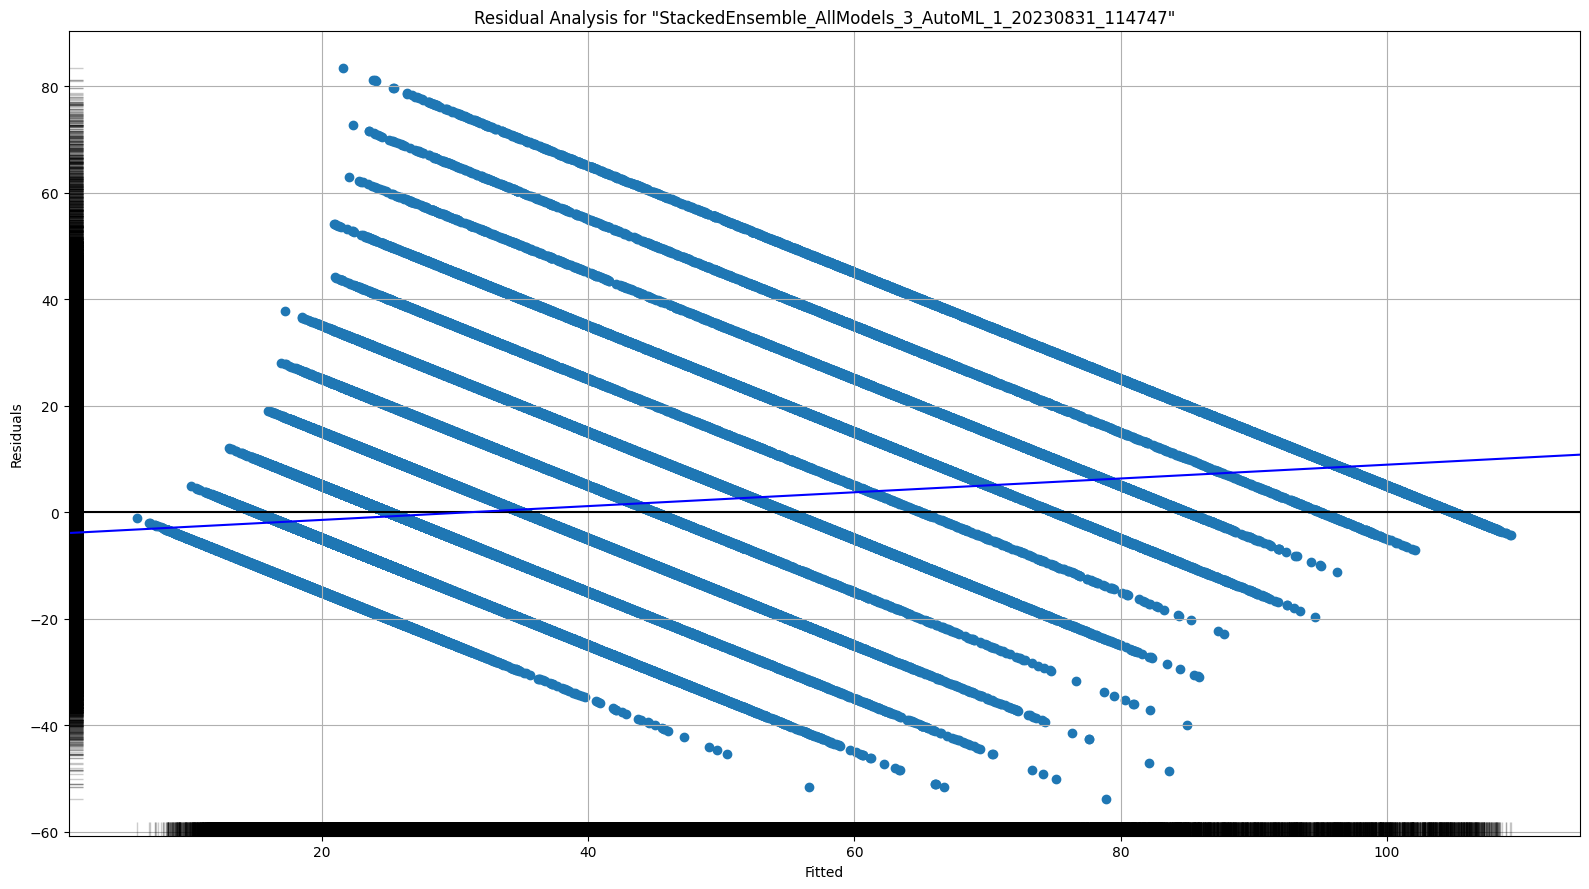

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

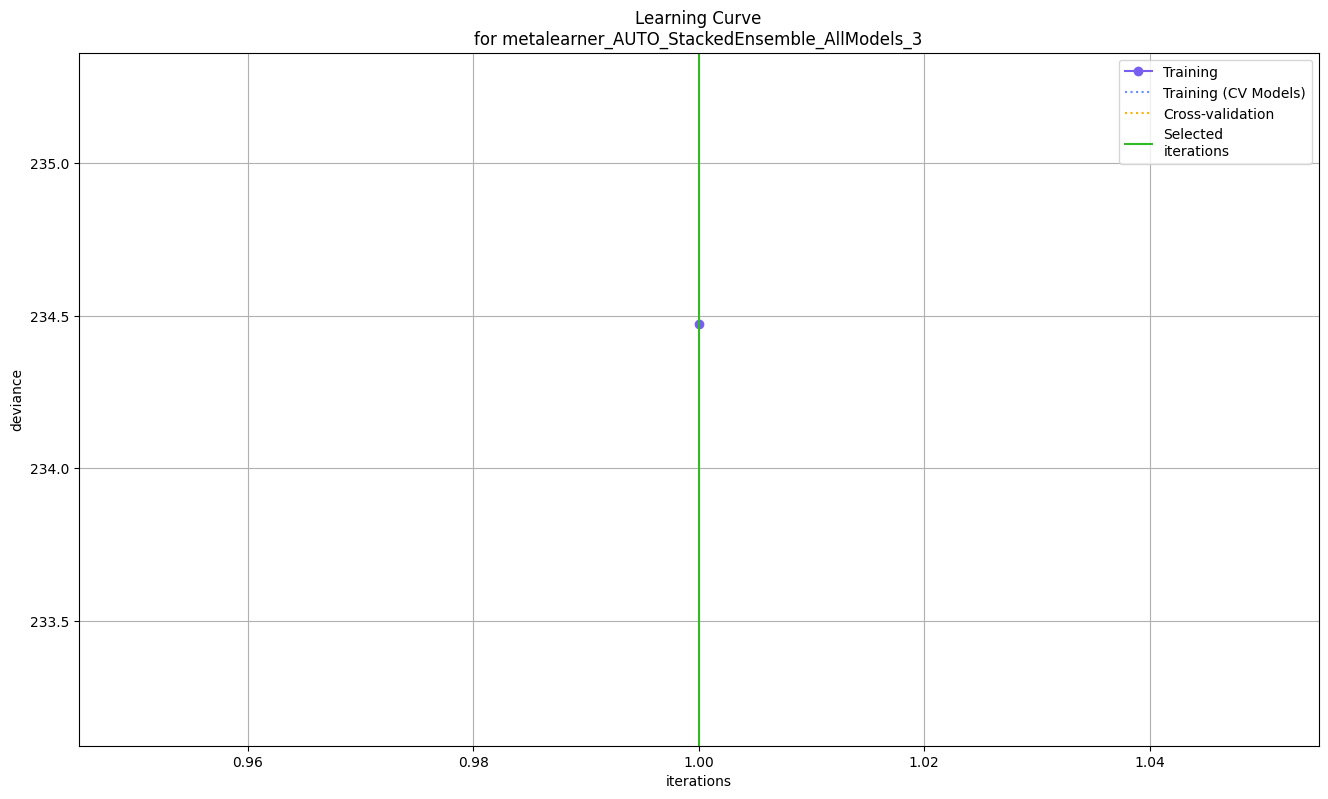

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

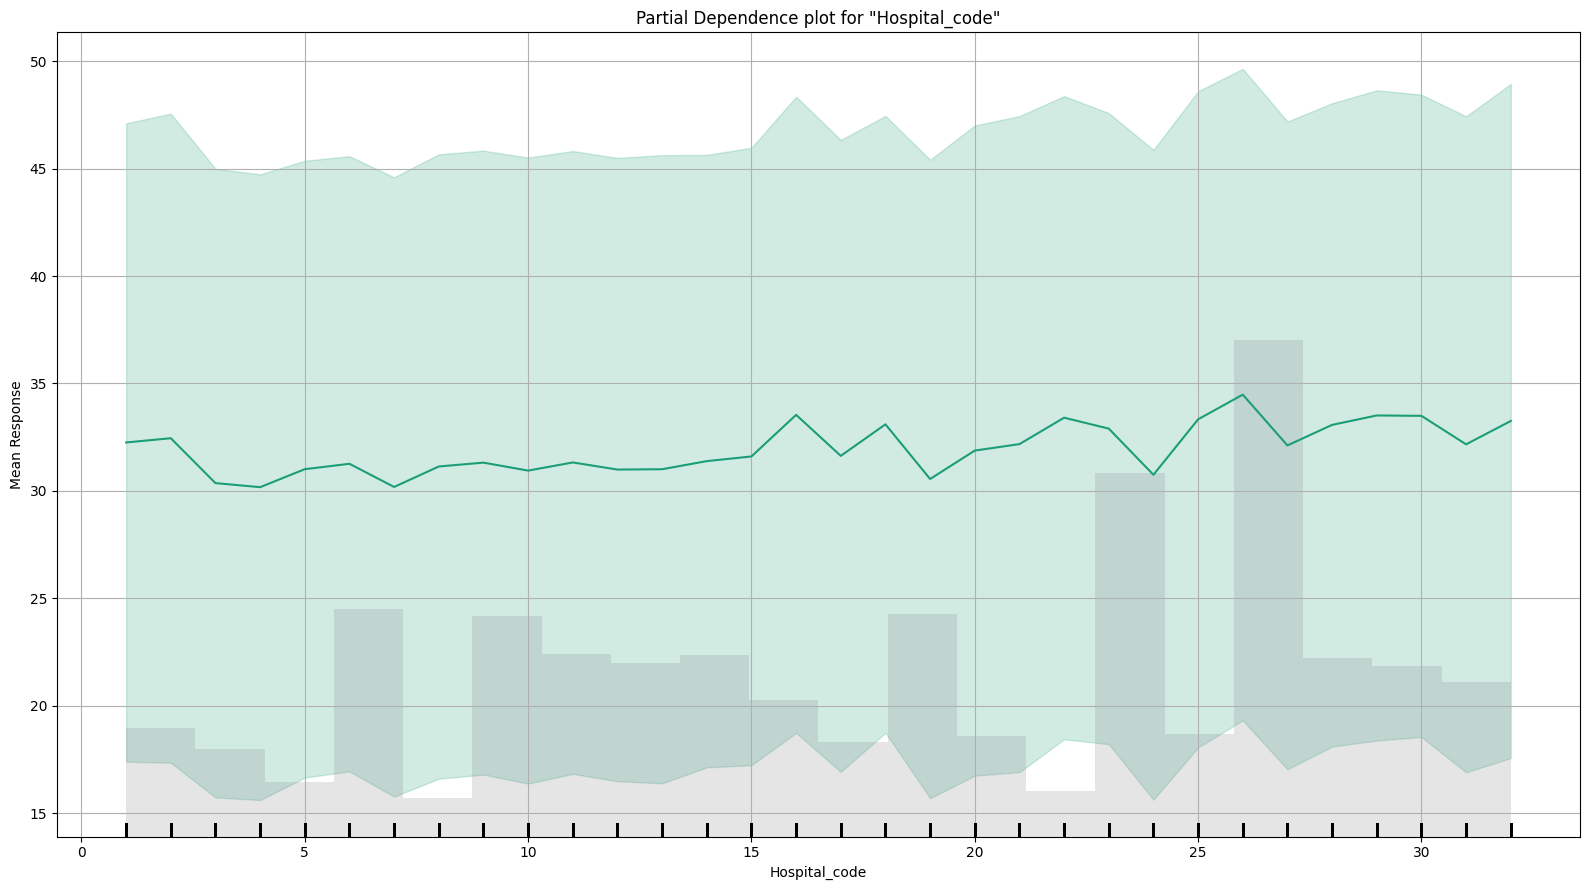

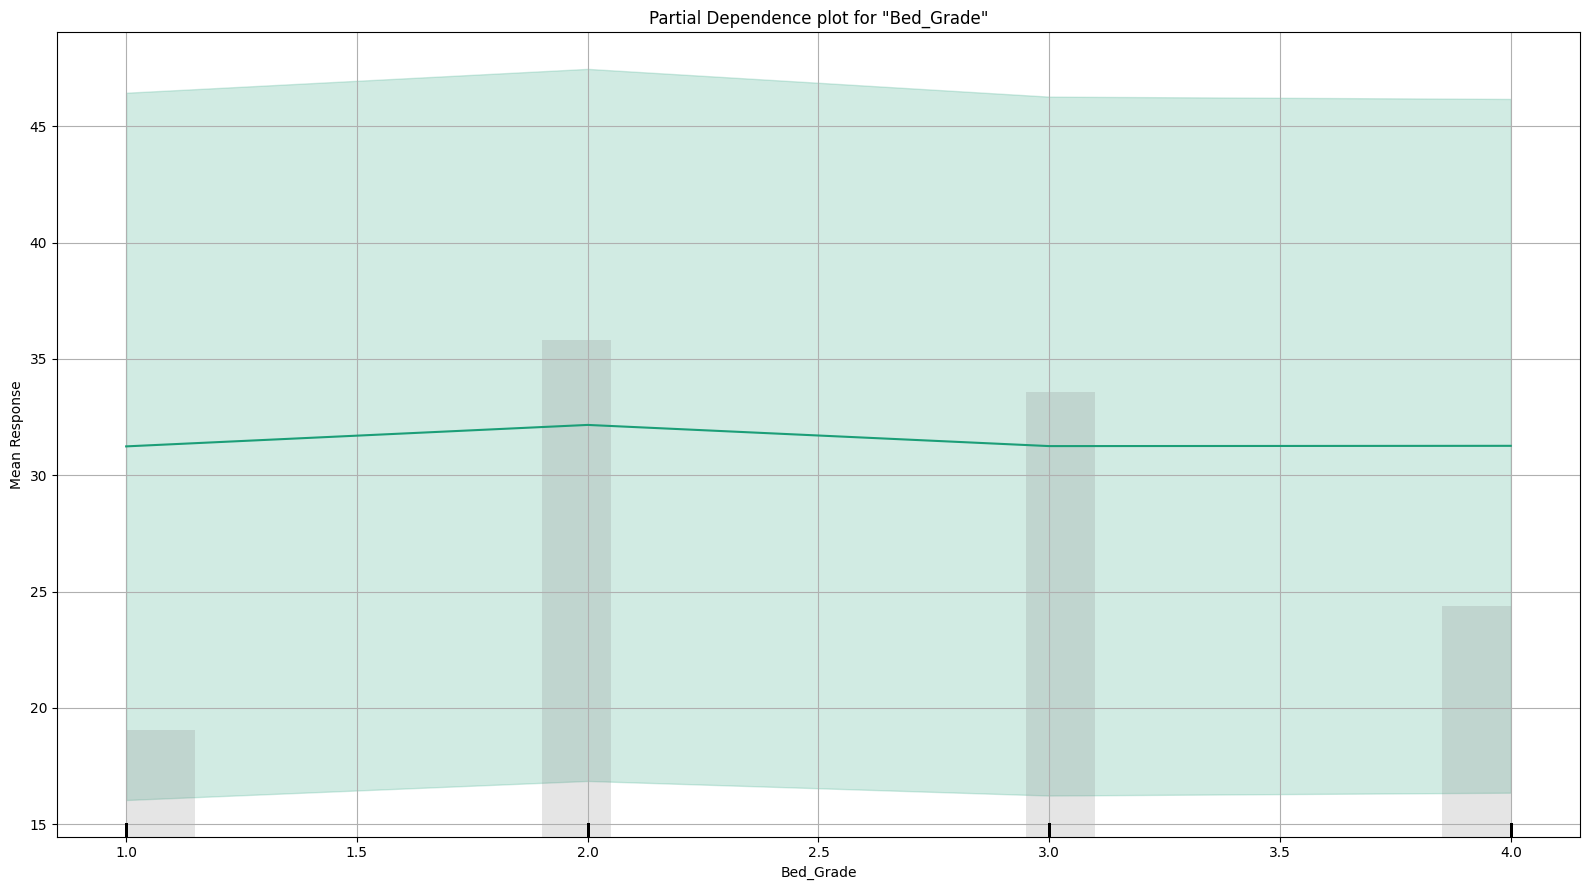

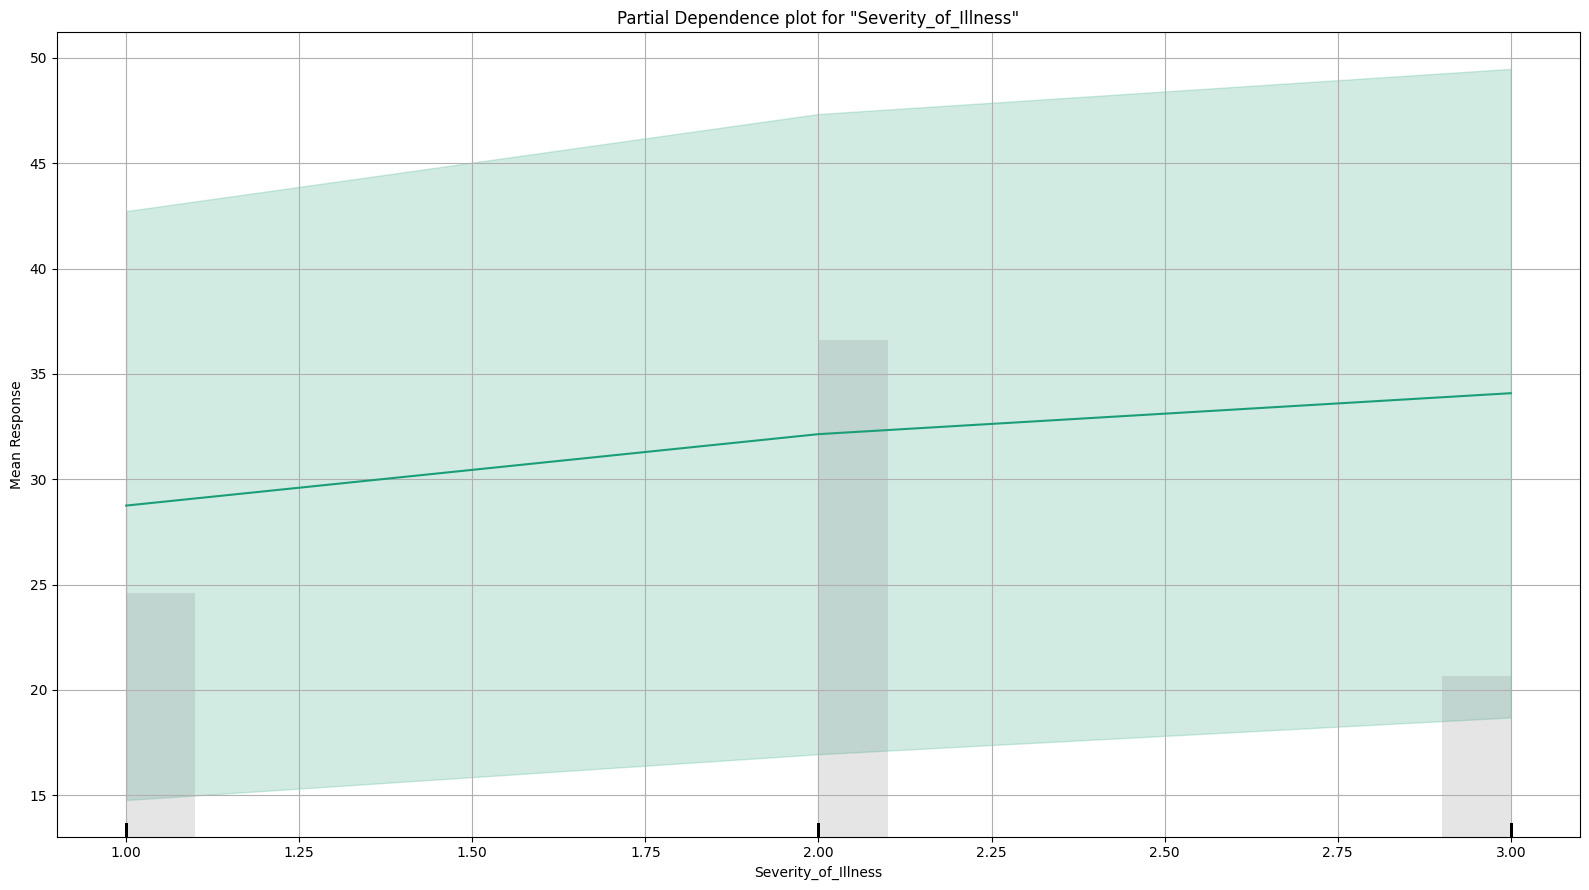

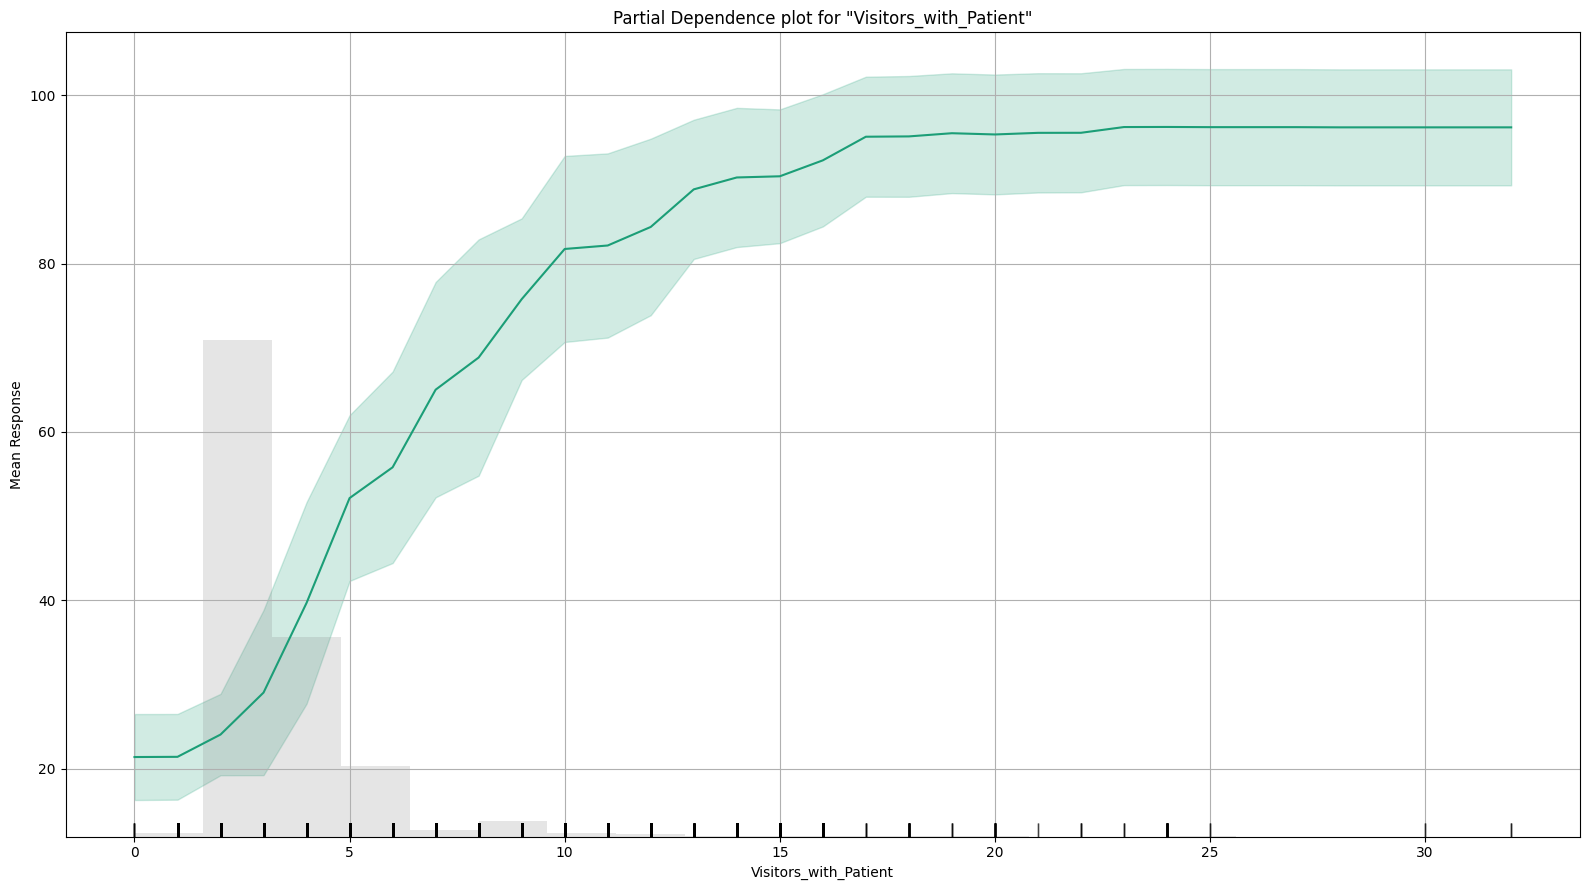

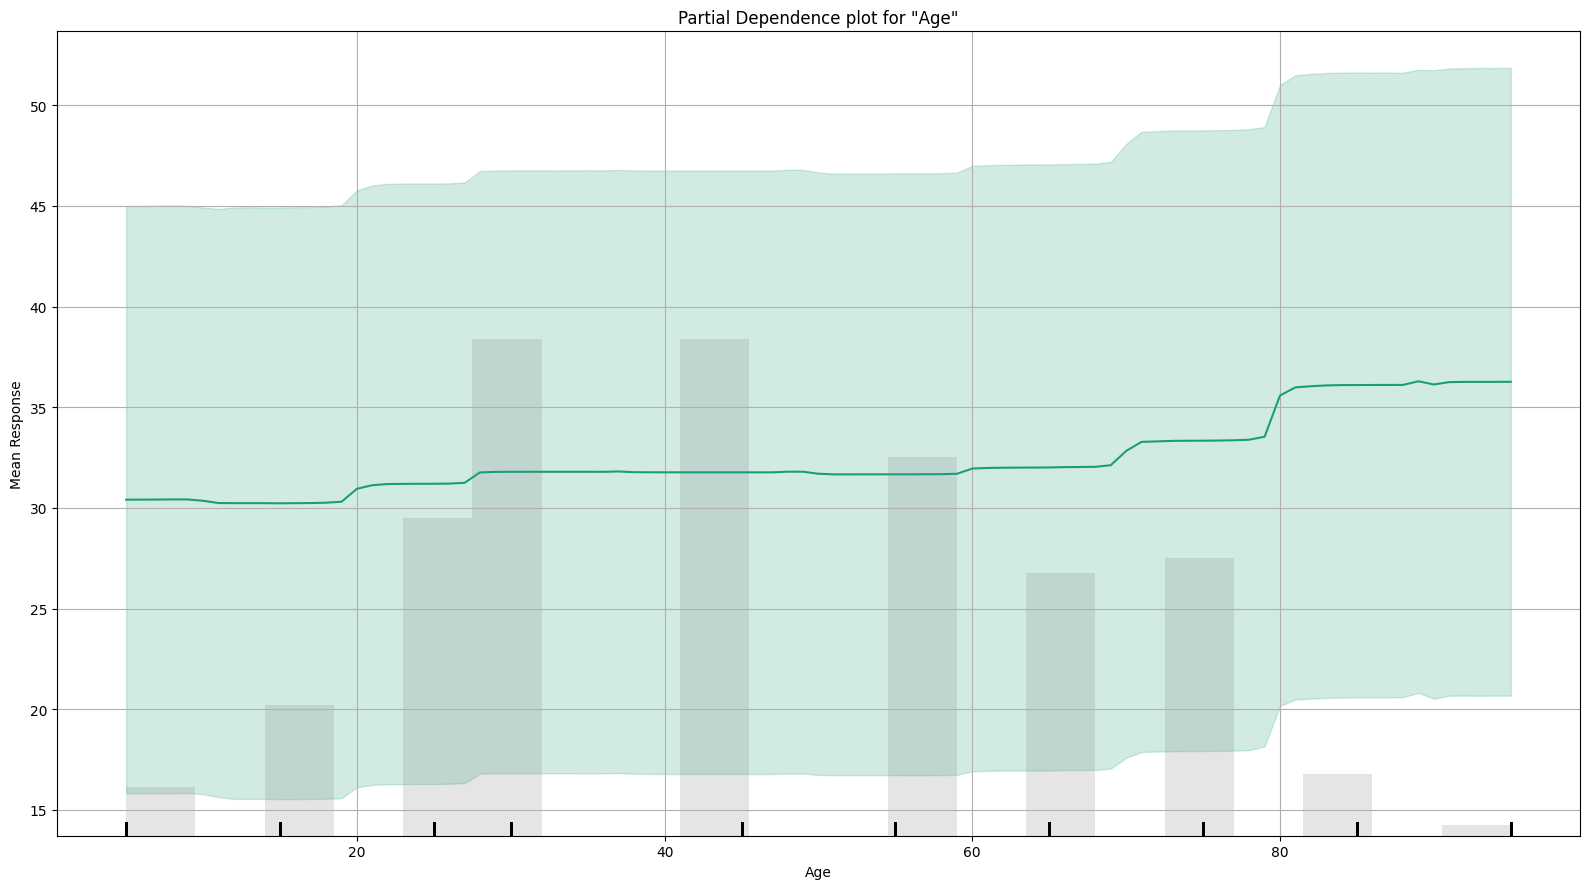

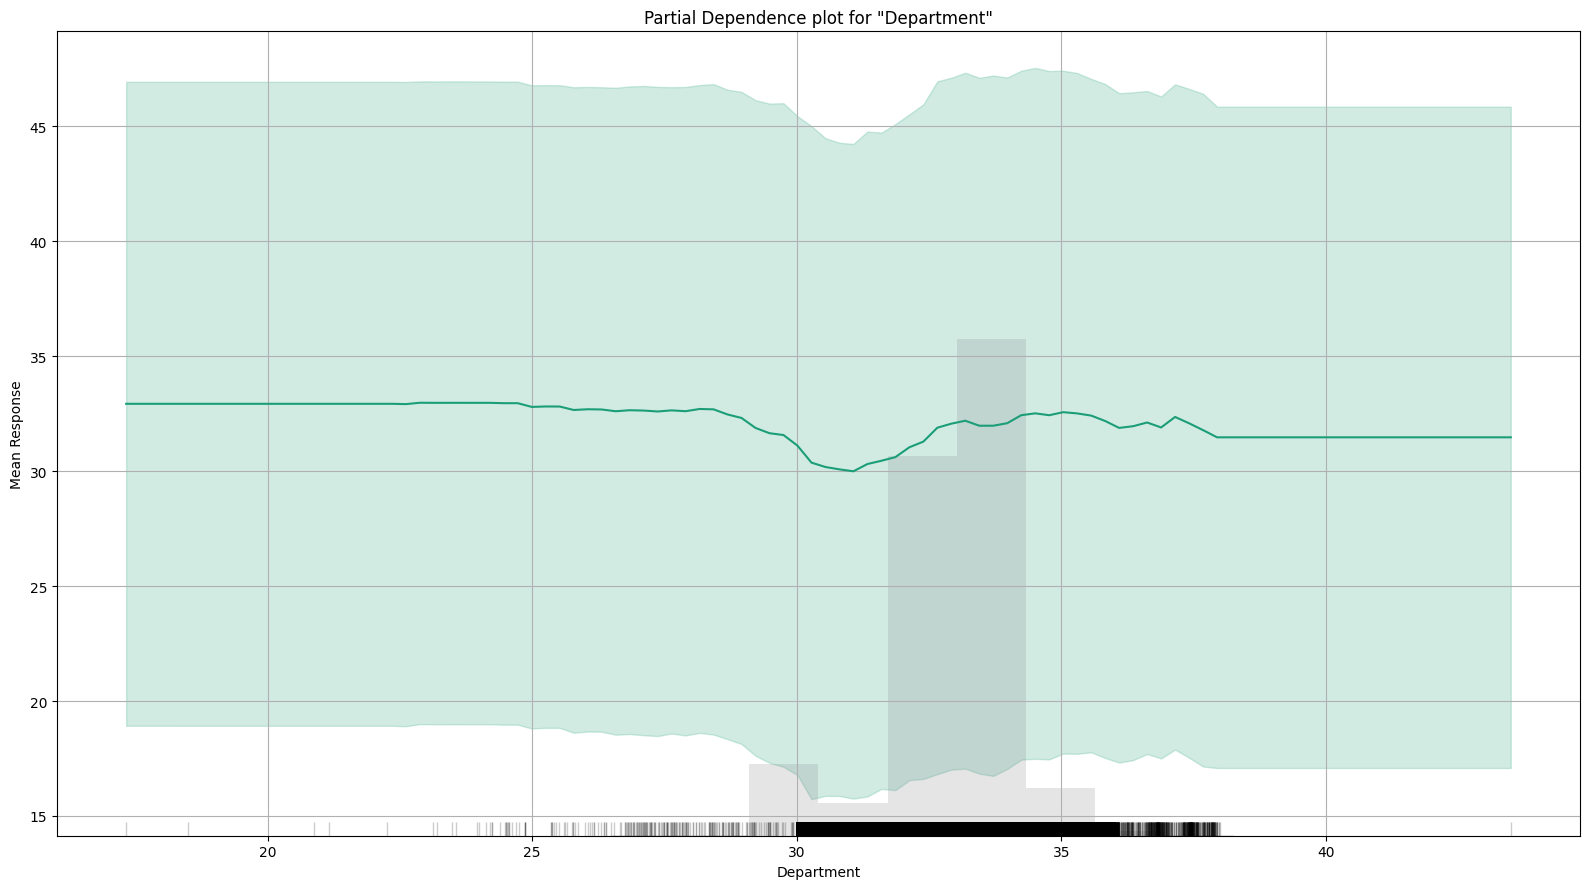

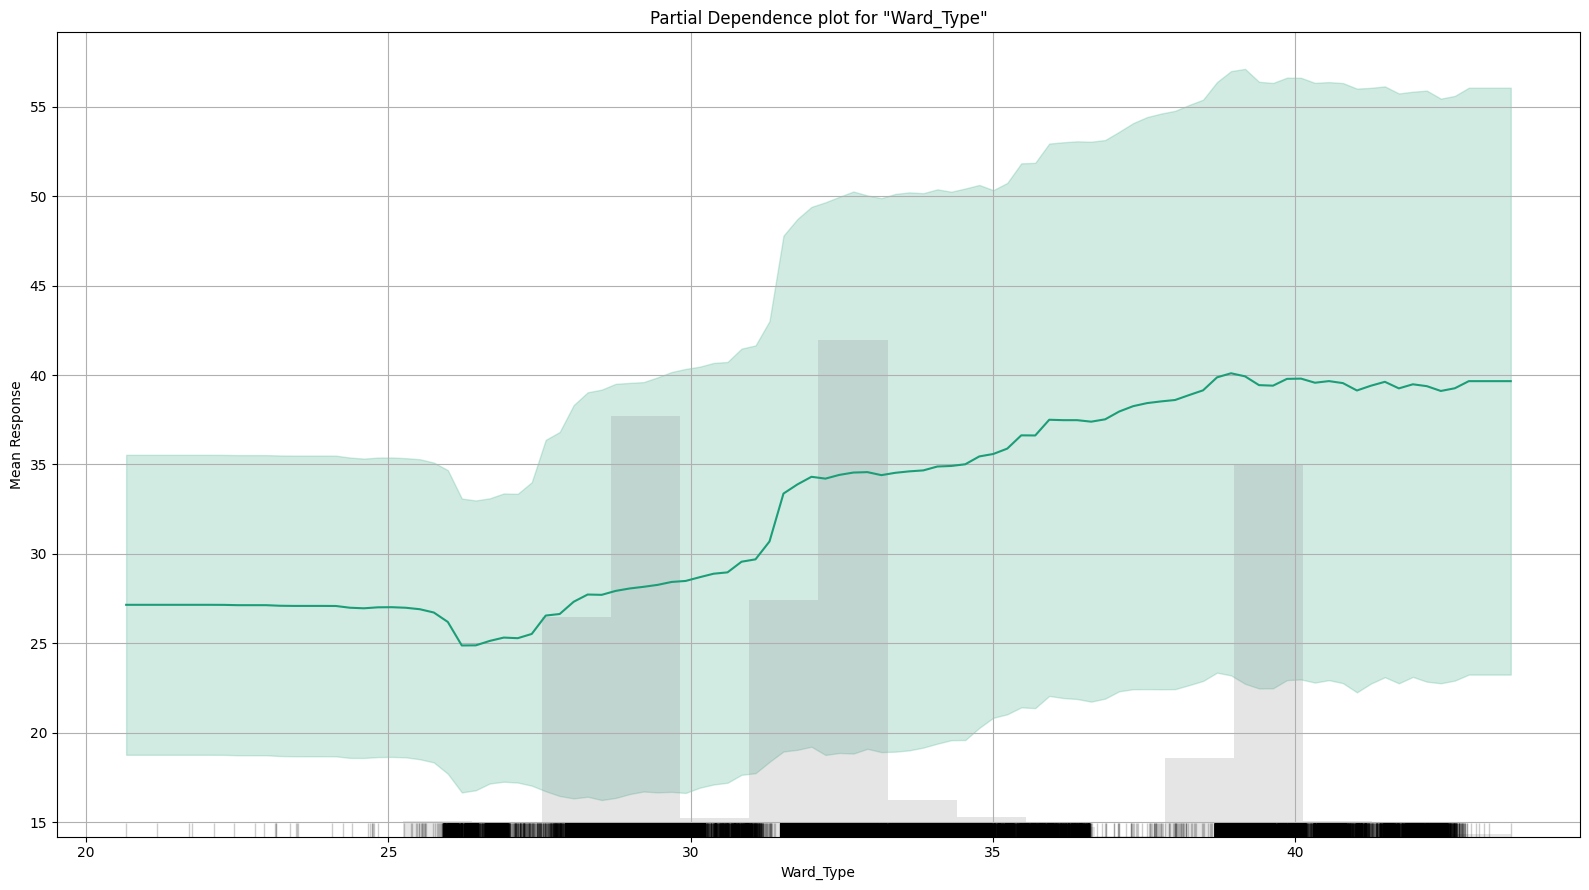

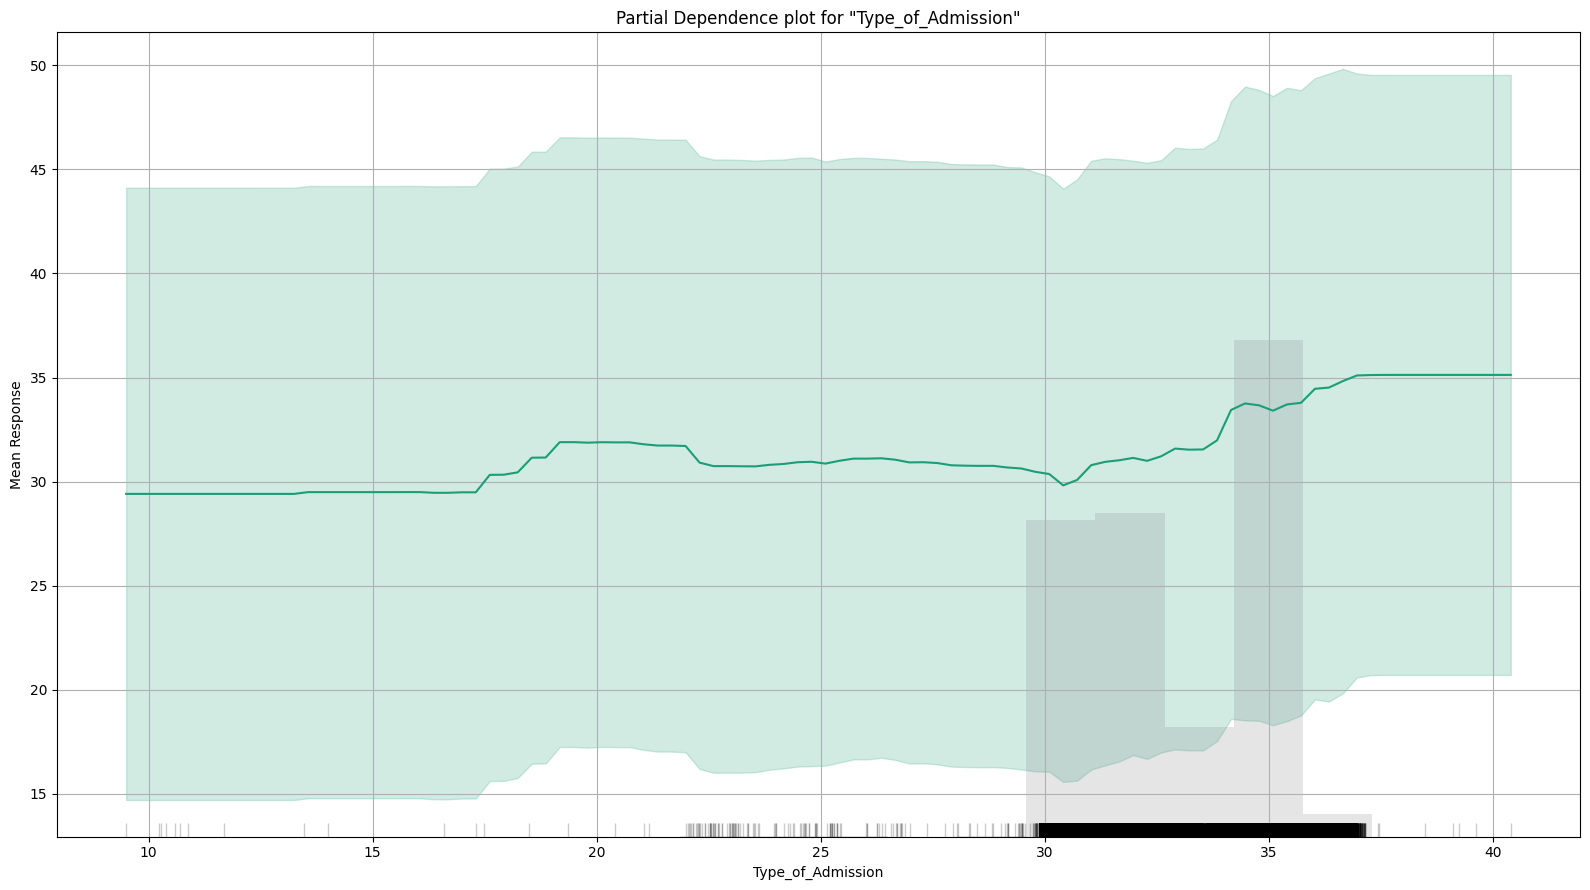

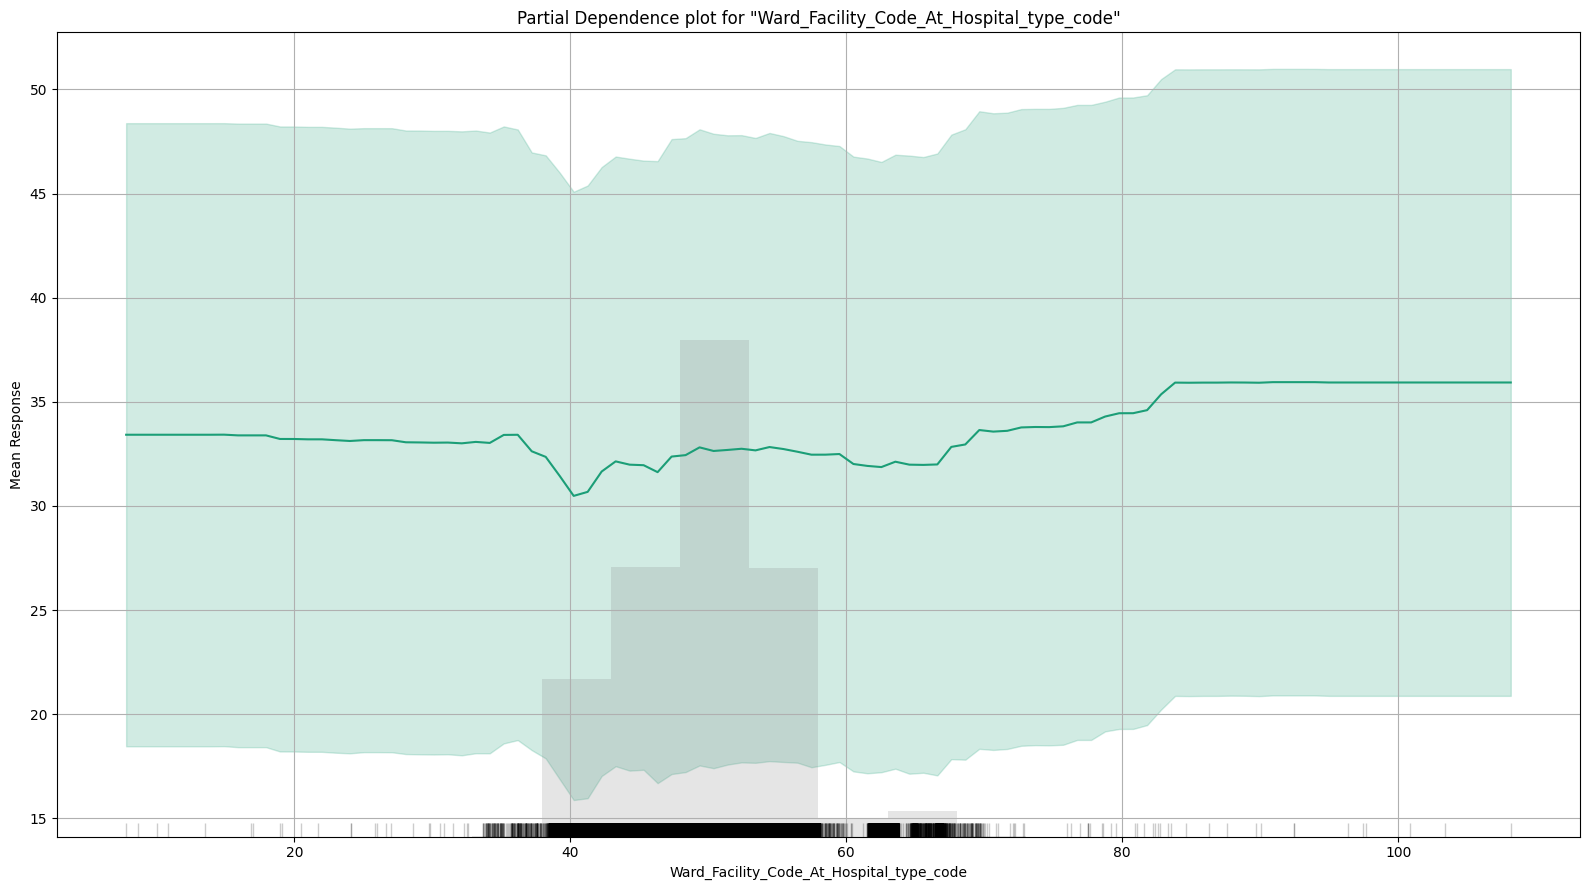

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

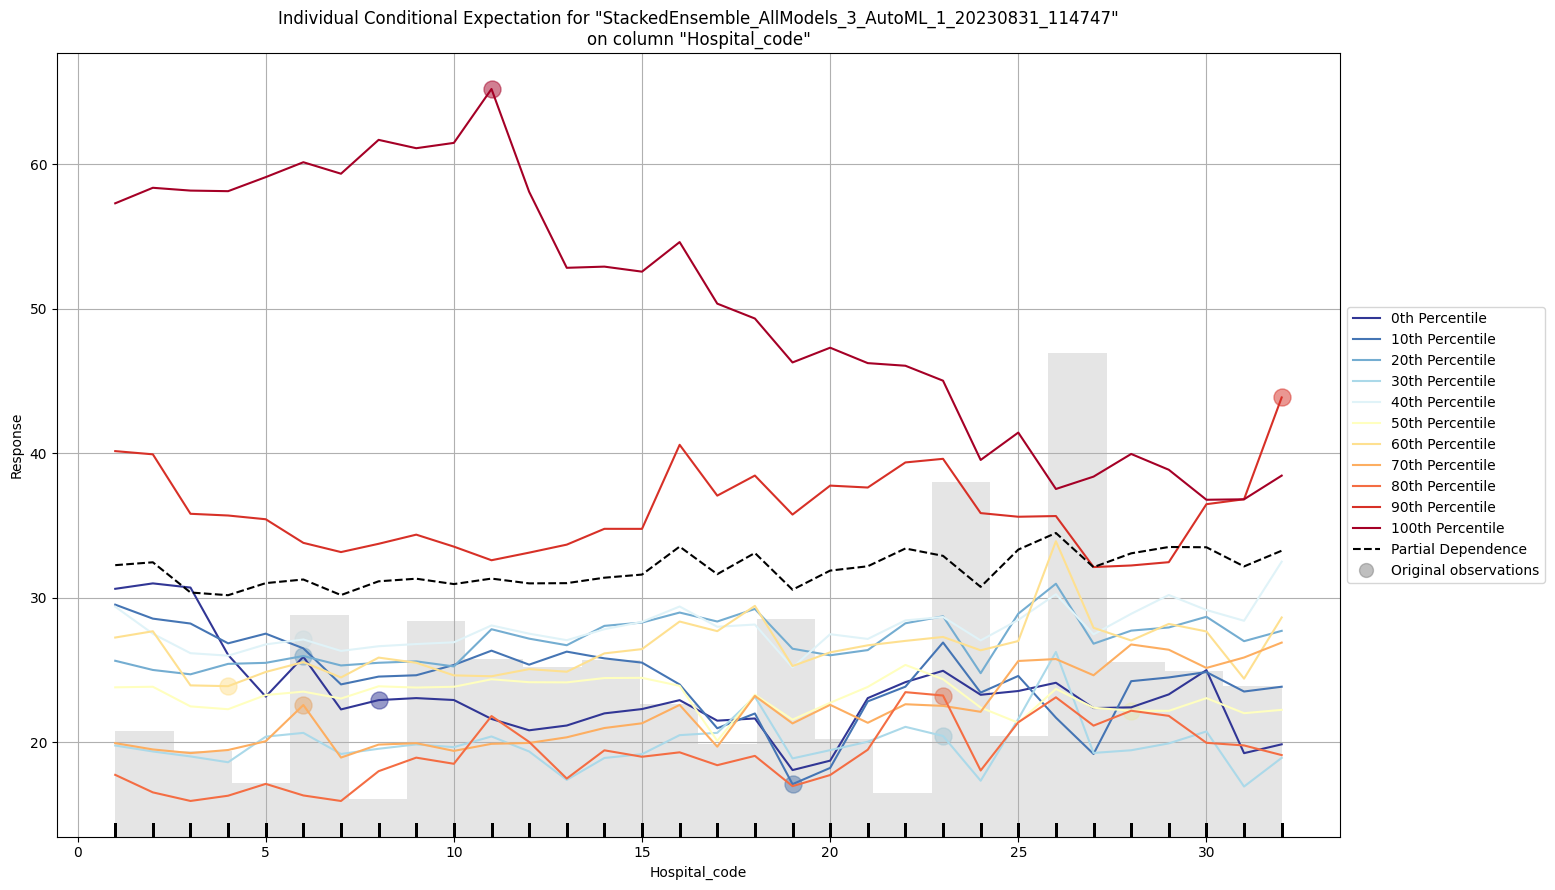

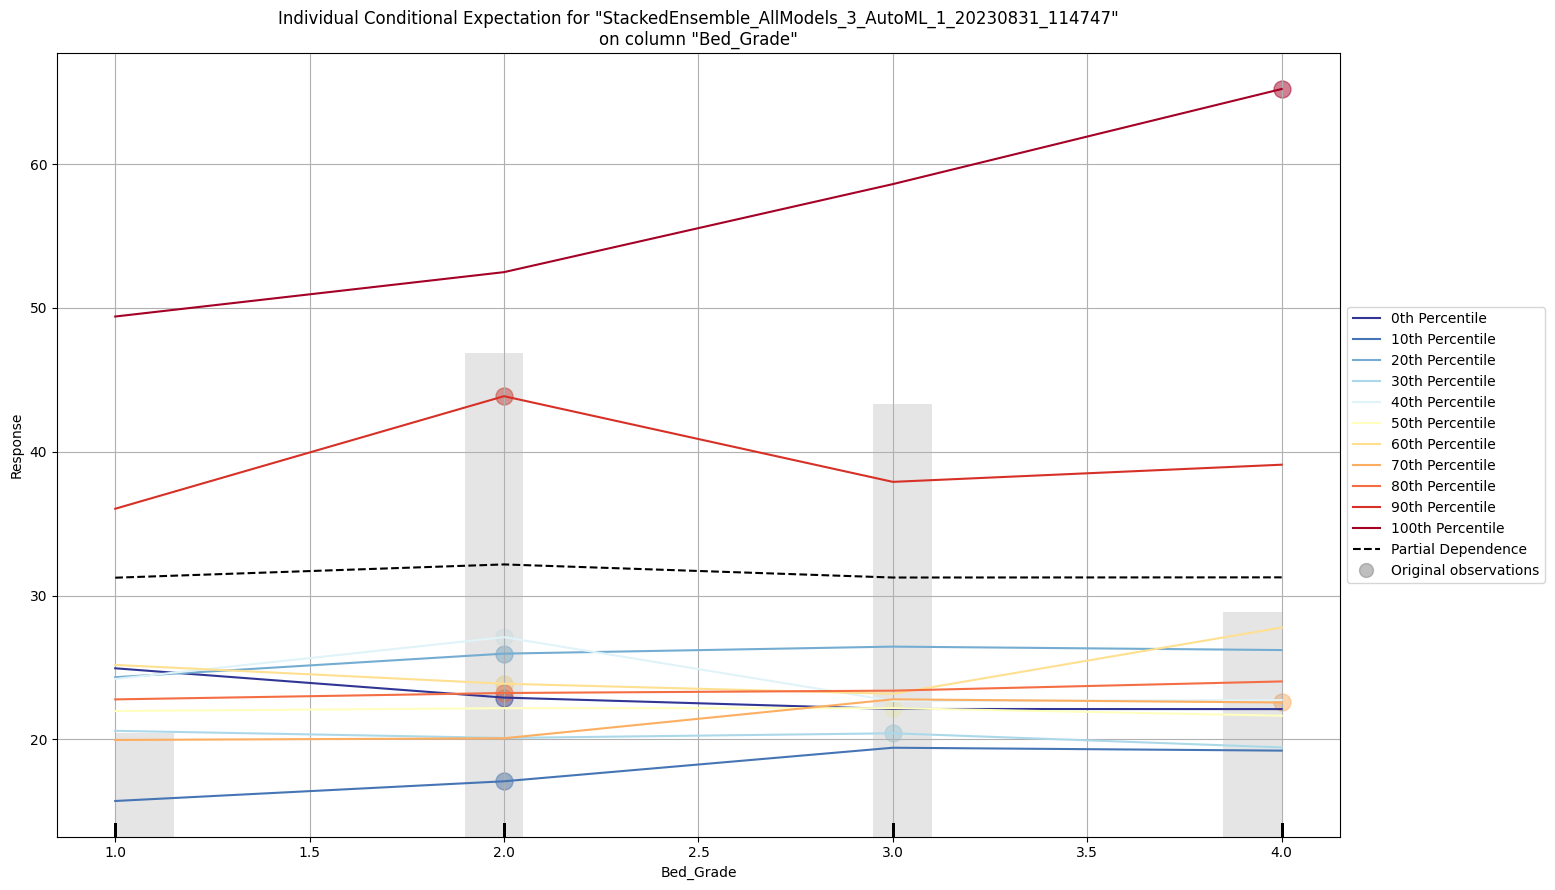

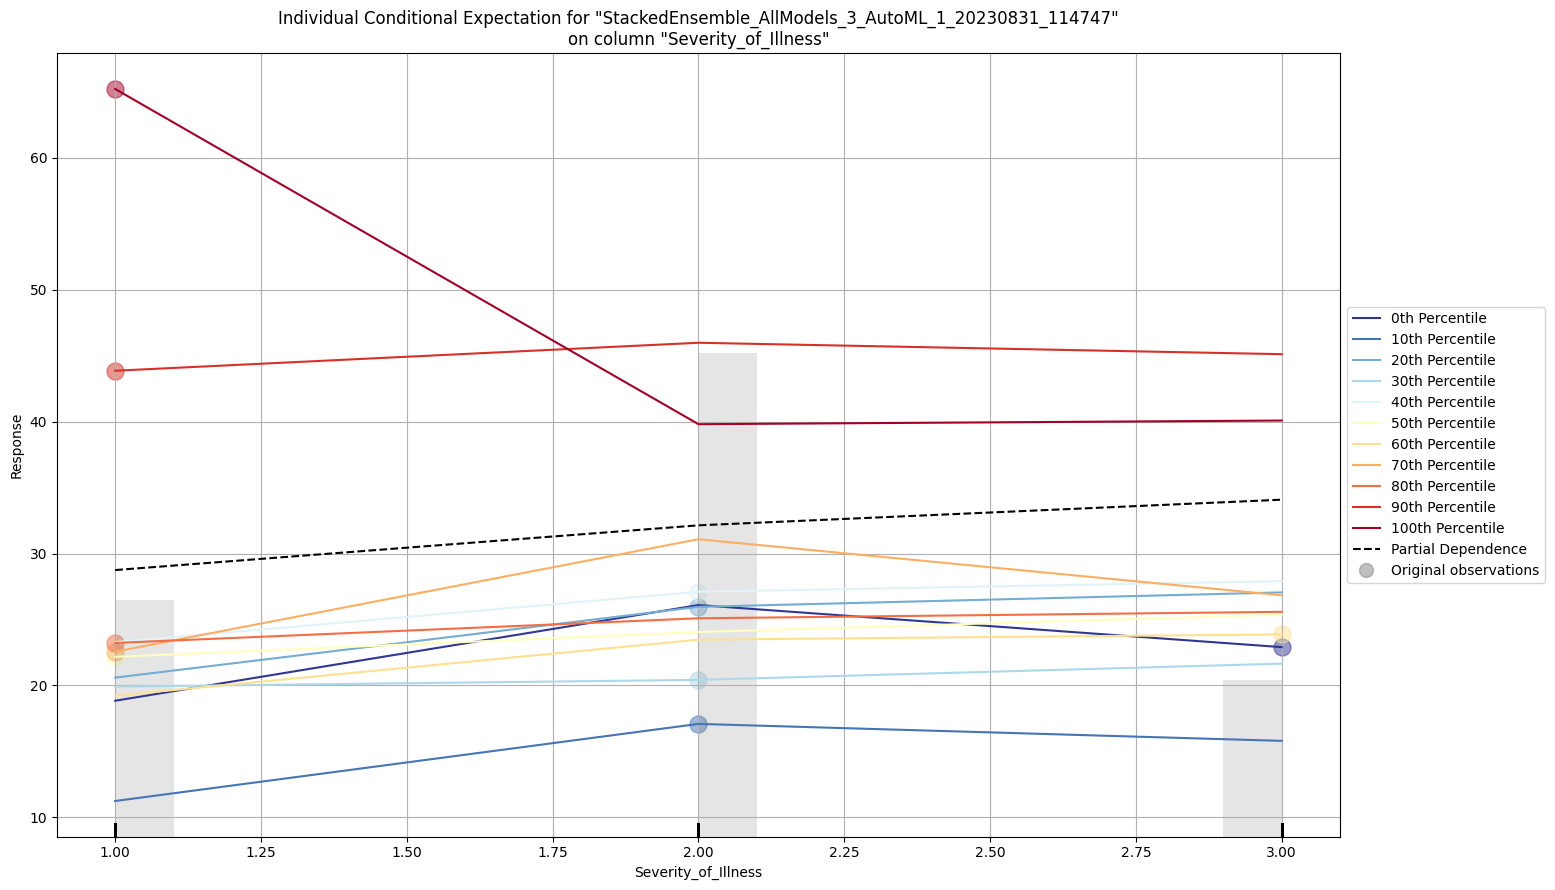

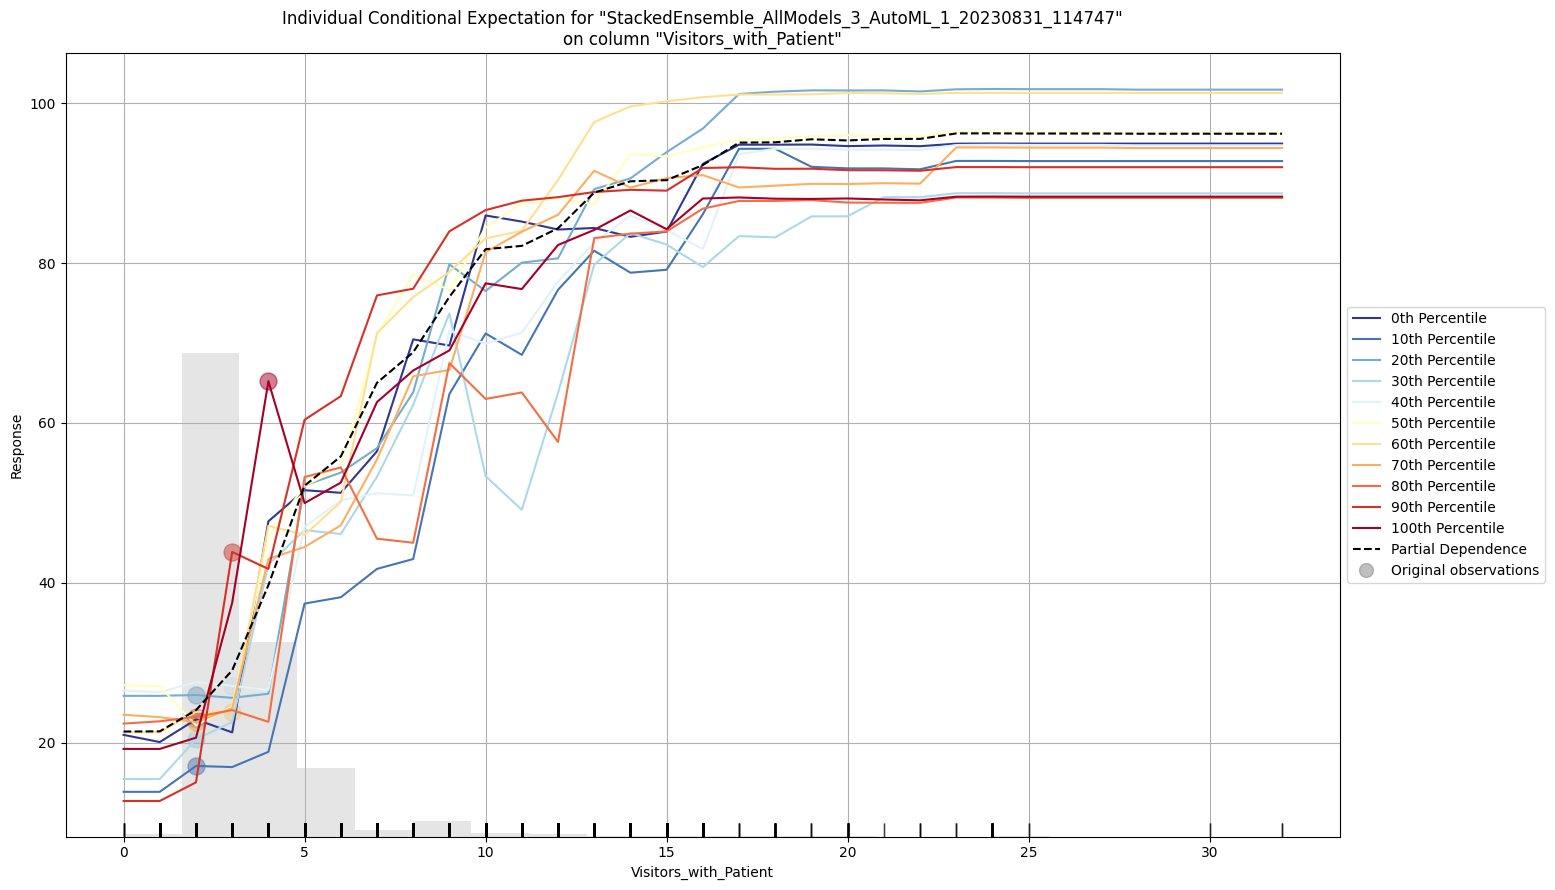

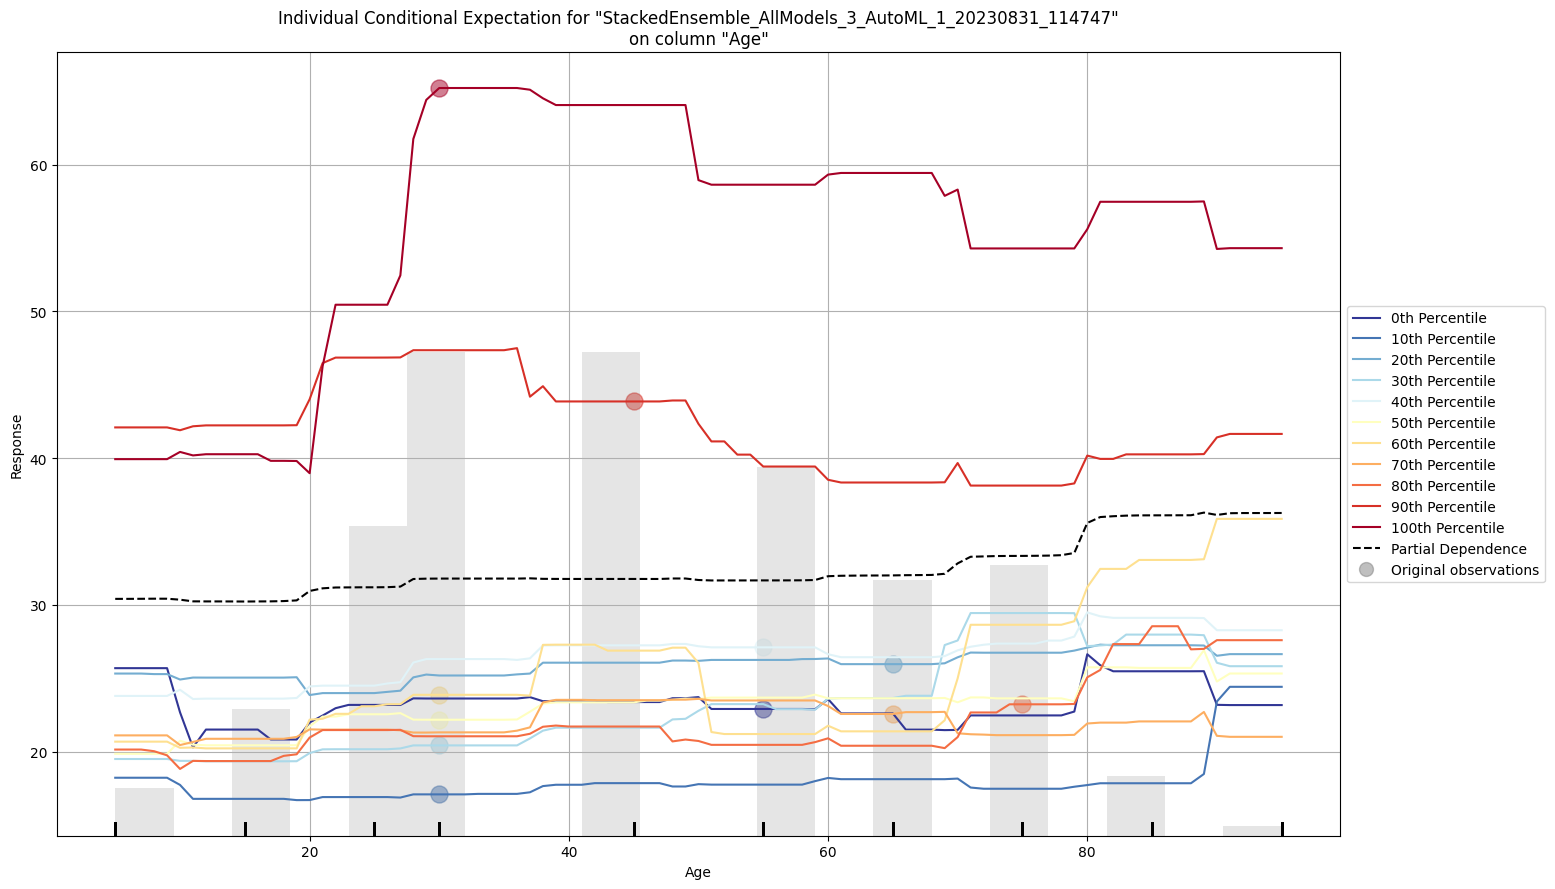

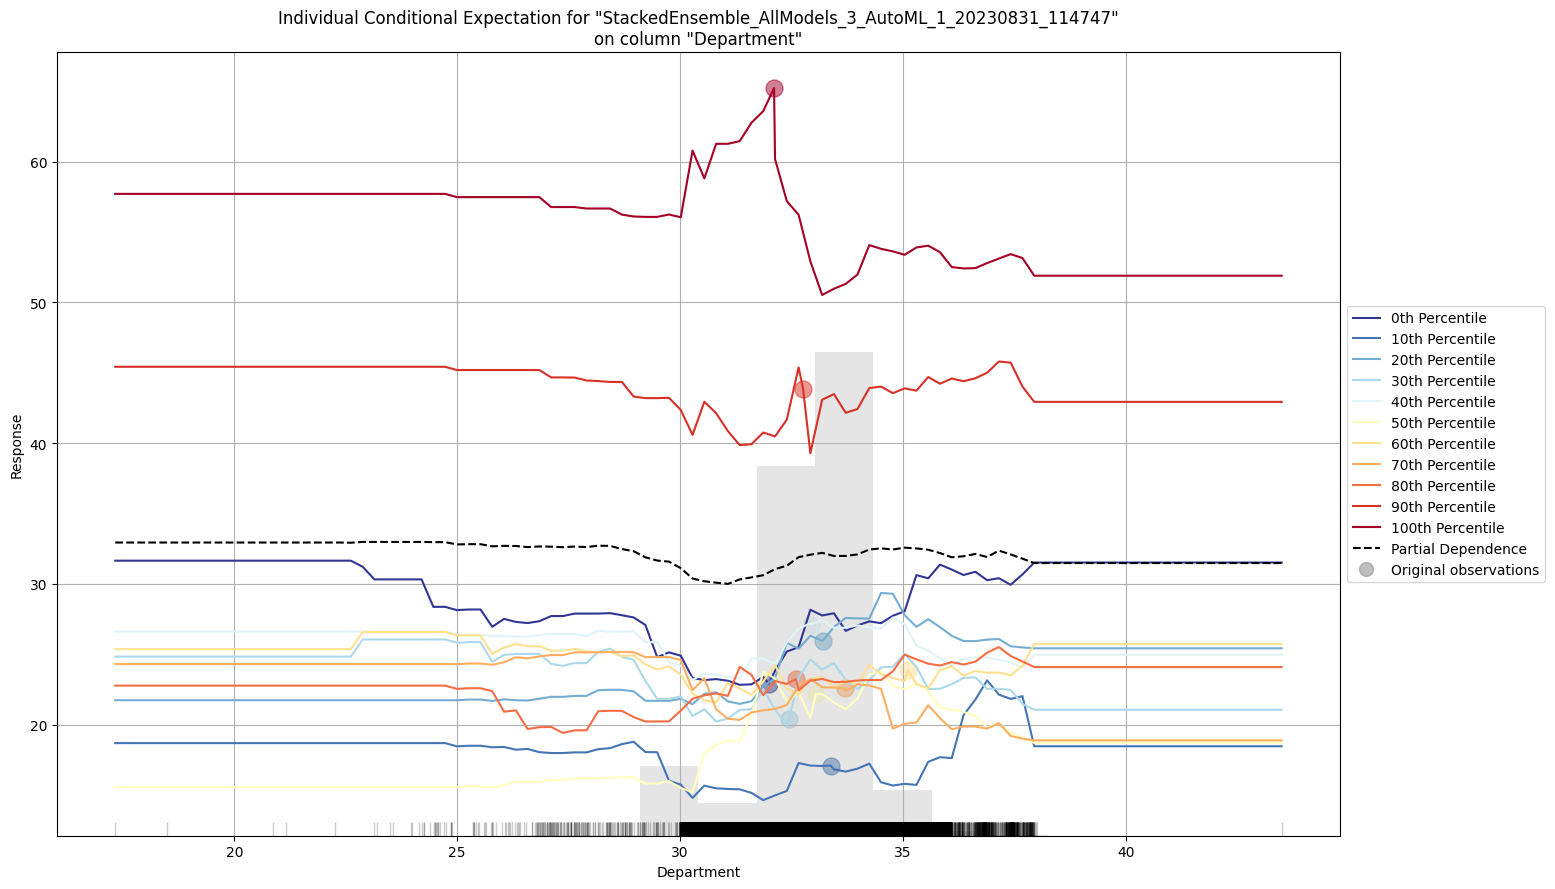

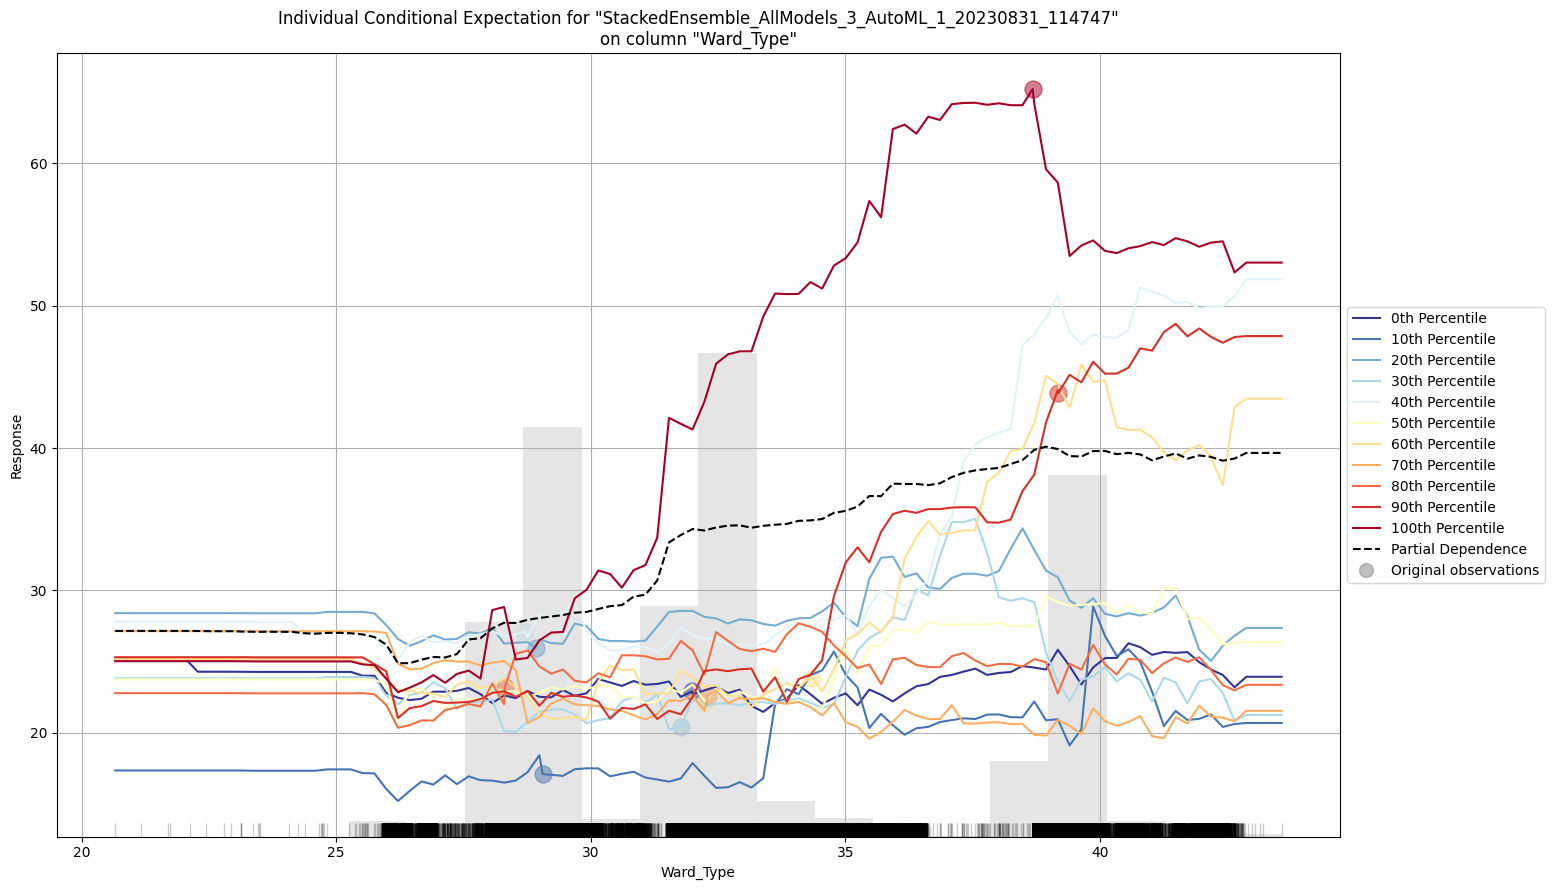

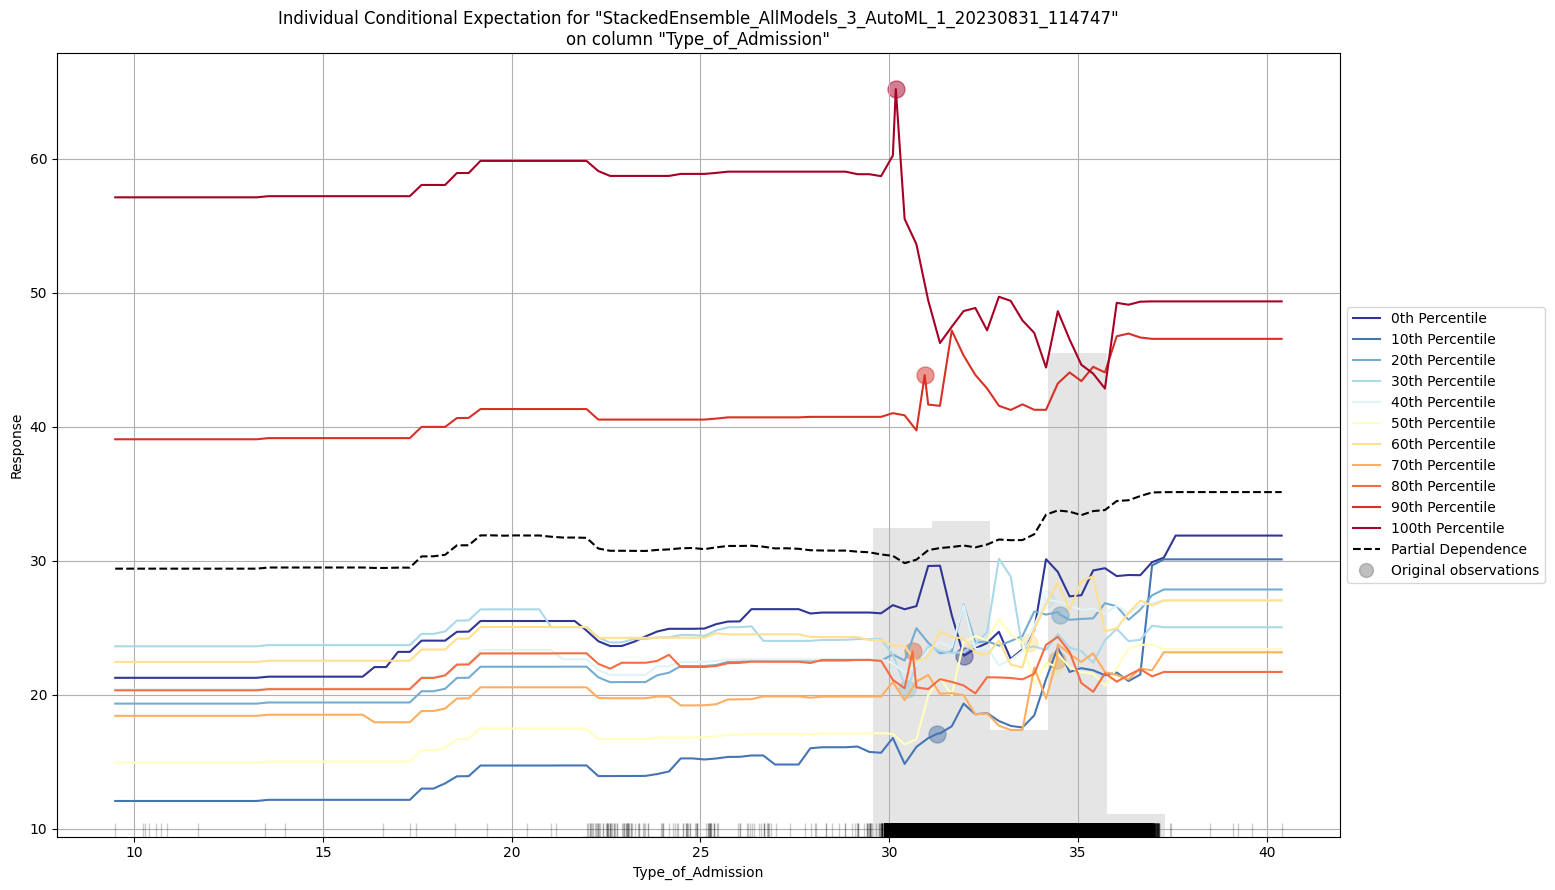

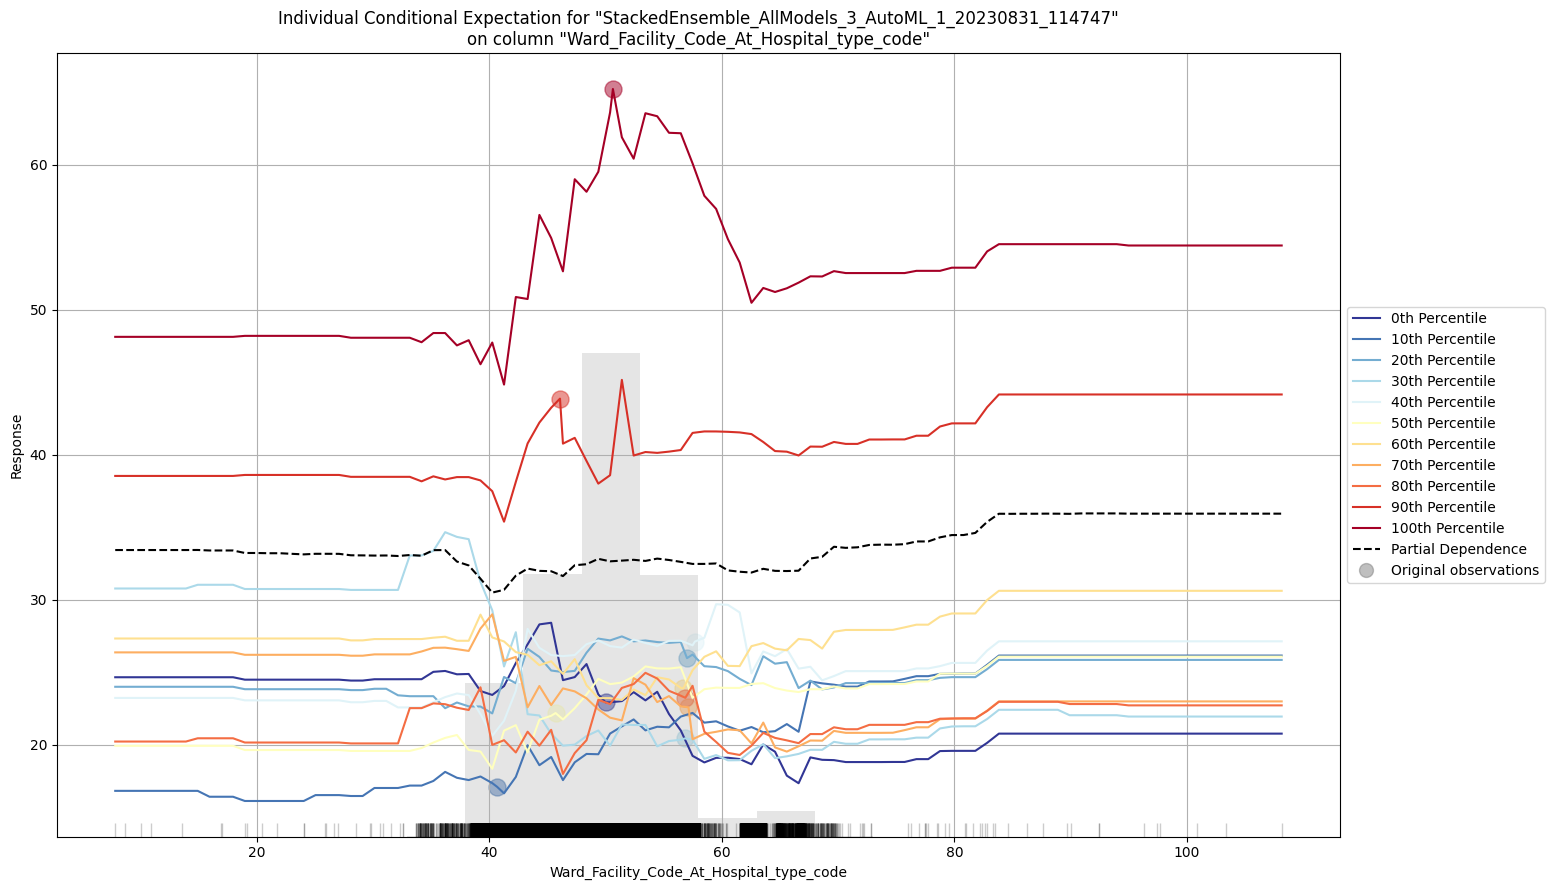

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

In [15]:
aml.leader.explain(train)

In [16]:
print ('Расчет окончен')

Расчет окончен


In [17]:
# Сохранение лучшей модели
h2o.save_model(aml.leader, path = "./")

'/home/jupyter/StackedEnsemble_AllModels_3_AutoML_1_20230831_114747'

In [3]:
# загружаю модель для дальнейшей работы с ней
import sys, os, os.path
aml_leader = h2o.load_model("/home/jupyter/StackedEnsemble_AllModels_3_AutoML_1_20230831_114747")
aml_leader

key,value
Stacking strategy,cross_validation
Number of base models (used / total),9/17
# GBM base models (used / total),3/7
# XGBoost base models (used / total),4/5
# DRF base models (used / total),2/2
# DeepLearning base models (used / total),0/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [31]:
import pandas as pd

# прогноз лидирующей моделю на валидационной выборке
val_pred=aml_leader.predict(valid)

# прогнозный датасеат сконвертиую его в пандас датафрейм
val_pred = val_pred.as_data_frame()

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [30]:
# из валидационного датасеат возбму столбец Stay и сконвертиую его в пандас датафрейм
val_test = valid['Stay'].as_data_frame()

In [32]:
# оценка с с помощью валиадционного датасета
import numpy as np
mae = np.mean(abs(val_pred['predict']-val_test['Stay']))
rmse = np.sqrt(np.mean((val_pred['predict']-val_test['Stay'])**2))
rae = np.mean(abs(val_pred['predict']-val_test['Stay']))/np.mean(abs(val_test['Stay']-np.mean(val_test['Stay'])))
rse = np.mean((val_pred['predict']-val_test['Stay'])**2)/np.mean((val_test['Stay']-np.mean(val_test['Stay']))**2)

print("Mean Absolute Error: {0:0.6f}".format(mae))
print("Root Mean Squared Error: {0:0.6f}".format(rmse))
print("Relative Absolute Error: {0:0.6f}".format(rae))
print("Relative Squared Error: {0:0.6f}".format(rse))

Mean Absolute Error: 9.084691
Root Mean Squared Error: 12.479567
Relative Absolute Error: 0.560500
Relative Squared Error: 0.336036


In [37]:
from sklearn.metrics import r2_score
print("The R-squared value is: {0:0.2f}% \n".format(100*r2_score(val_test, val_pred)))

The R-squared value is: 66.40% 

